# Aviation Industry Analysis

#### Elina Rankova

<div style="width: 100%; text-align: center;">
  <img src="https://www.bellaromeitalianadventures.com/wp-content/uploads/2018/03/aeroplane5.jpg" width="720" height="450" style="margin: 0 auto;"/>
</div>

Source: <a href="https://www.bellaromeitalianadventures.com/rome-fiumicino-airport-number-one-world/">Bellarome Italians Adventures</a>

## 1. Business Problem and Understanding

**Stakeholders:** CEO, Head of Operations, Head of Aviation (brand new department)

Fortune Inc. is expanding into airplane aviation to diversify its portfolio. We aim to evaluate which aircrafts and aircraft specifics pose the lowest risk as we venture into a brand new industry. As we are so new to the industry, we want to focus on identifying the industry standard for aircraft make and model, and which top make and model results in least number of destroyed aircrafts during accident events to account for easier financial maintainance. We also want to focus on which type of engine and number of engines correspond to the least number of fatal injuries.

**Some preliminary questions include:**

- *What type of aircraft makes the most sense to purchase first when considering industry standard?*
- *How is type of engine and number of engine related to total injuries during accidnet events?*
- *Have there been improvements in aviation technology and regulation helping us determine which event years provide relevant data?*

For analysis, we are using data from the <a href = "https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses">Aviation Accident Database & Synopses</a>, up to 2023.

Each record represents an accident event and includes much information about aircraft specifics as well as passenger injury details and information about accident events.

**The goal: evaluate which type of airplane poses least risk, as defined above, to purchase and as we enter an industry we have not explored before.**

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load in data

# Had to specify encoding 'latin-1' for file to load
# Setting low_memory=False in the read_csv function will force pandas to read the entire file at once, 
# which can help with inferring the correct data types. 

ad = pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)
ad.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
ad.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


We will have to do some cleaning since there seems to be a good amount of missingness. There are date columns that might also need to be converted to a non-object type.

**Additional observations:**
- 88888 rows and 31 columns
- 5 floats and 26 objects
- Columns may will need capitalization adjusted
- There are some outliers that may need to be addressed

## 2. Data Exploration & Preparation 

The following process reflects preliminary data cleaning to adjust the dataframe to a working condition for the subsequent statistical analysis and visualization exploration.

Handling the missingness will be a large part of data cleaning for this dataset.

In [5]:
# Assess the missingness

ad.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [6]:
# Assess missingness by percentage

ad.isna().sum()/len(ad)*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

#### Exploration of Column Values

To understand how to handle the missingness as well as understand which imputations may be necessary for analysis, we must explore relevant column.

Some columns will be dropped and must be noted as such.

**Accident.Number:** Unable to identify whether repeated indices are intentional or not because in the data, the records differ slightly. This is a data limitation.

In [7]:
ad['Accident.Number'].value_counts()

CEN22LA149    2
WPR23LA041    2
WPR23LA045    2
DCA22WA214    2
DCA22WA089    2
             ..
LAX92FA065    1
ANC92T#A12    1
MIA92LA049    1
NYC92LA048    1
ERA23LA097    1
Name: Accident.Number, Length: 88863, dtype: int64

<br>**Injury Severity:** Adjust capitalization and combine all fatal cases into one.

In [8]:
ad['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: Injury.Severity, Length: 109, dtype: int64

<br>**Aircraft Damage:** Can adjust capitalization, imputate NA to 'unknown', then redistribute unknowns based on probability.

In [9]:
ad['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

<br>**Make:** Lowercase all letters.

In [10]:
ad['Make'].value_counts()

Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: Make, Length: 8237, dtype: int64

<br>**Number of Engines:** Missing ~7% of data based on .info(). Distribute na values based on probability distribution of existing values.

In [11]:
ad['Number.of.Engines'].value_counts(normalize=True)

1.0    0.840312
2.0    0.133796
0.0    0.014806
3.0    0.005833
4.0    0.005205
8.0    0.000036
6.0    0.000012
Name: Number.of.Engines, dtype: float64

<br> **Engine Type:** Adjust capitalization. Missing ~8% of data based on .info(); we can combine unknown & UNK and then redistribute missing values based on probability.

In [12]:
ad['Engine.Type'].value_counts(normalize=True)

Reciprocating      0.849875
Turbo Shaft        0.044113
Turbo Prop         0.041449
Turbo Fan          0.030326
Unknown            0.025070
Turbo Jet          0.008593
None               0.000232
Geared Turbofan    0.000147
Electric           0.000122
LR                 0.000024
NONE               0.000024
Hybrid Rocket      0.000012
UNK                0.000012
Name: Engine.Type, dtype: float64

<br> **Purpose of Flight:** Can imputate and na to 'Unknown' & adjust capitalization.

In [13]:
ad['Purpose.of.flight'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Personal
1        Personal
2        Personal
3        Personal
4        Personal
           ...   
88884    Personal
88885         NaN
88886    Personal
88887    Personal
88888    Personal
Name: Purpose.of.flight, Length: 88889, dtype: object>

<br> **Total Uninjured:** Drop na, may help understand which aircraft is safest

In [14]:
ad['Total.Uninjured'].value_counts()

0.0      29879
1.0      25101
2.0      15988
3.0       4313
4.0       2662
         ...  
558.0        1
412.0        1
338.0        1
401.0        1
455.0        1
Name: Total.Uninjured, Length: 379, dtype: int64

<br> **Weather Condition:** Adjust capitalization and combine; unk & unknown

In [15]:
ad['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

<br> **Broad Phase of Flight:** Combine 'unknown' & 'other'.

In [16]:
ad['Broad.phase.of.flight'].value_counts(normalize=True)

Landing        0.249951
Takeoff        0.202401
Cruise         0.166370
Maneuvering    0.131942
Approach       0.106053
Climb          0.032953
Taxi           0.031722
Descent        0.030572
Go-around      0.021920
Standing       0.015310
Unknown        0.008878
Other          0.001928
Name: Broad.phase.of.flight, dtype: float64

### Basic Data Cleaning

The next step in cleaning is dropping or accounting missingness where appropriate, adjusting data types, capitalization, and other minor adjustments to the database.

#### Create `Event.Year` Column

In [17]:
# Create event year column

ad['Event.Year'] = ad['Event.Date'].str[:4]
ad['Event.Year'].min()

'1948'

#### Create `Total.Injuries` Column

In [18]:
# Create injuries column

ad['Total.Injuries'] = ad['Total.Fatal.Injuries']+ad['Total.Serious.Injuries']+ad['Total.Minor.Injuries']
ad['Total.Injuries'].value_counts()

0.0      40561
1.0      17305
2.0      10231
3.0       2701
4.0       1927
         ...  
101.0        1
57.0         1
119.0        1
143.0        1
99.0         1
Name: Total.Injuries, Length: 116, dtype: int64

#### Drop missing values

In [19]:
# Dropping rows of columns with few missing data
# Will not impact overall analysis

ad.dropna(inplace=True, 
          subset=['Location', 'Country', 'Make', 'Model',
                  'Injury.Severity','Total.Uninjured','Total.Fatal.Injuries',
                  'Total.Serious.Injuries','Total.Minor.Injuries','Total.Injuries'])
ad.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  50673
Longitude                 50672
Airport.Code              31647
Airport.Name              29364
Injury.Severity               0
Aircraft.damage            2142
Aircraft.Category         45755
Registration.Number         226
Make                          0
Model                         0
Amateur.Built                 1
Number.of.Engines          3957
Engine.Type                4801
FAR.Description           45964
Schedule                  62811
Purpose.of.flight          3604
Air.carrier               57492
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3060
Broad.phase.of.flight     24754
Report.Status              5442
Publication.Date          13104
Event.Ye

#### Adjust Data Types

In [20]:
# Convert dtype columns to int

ad['Event.Year']= ad['Event.Year'].astype(int)
ad['Total.Fatal.Injuries']= ad['Total.Fatal.Injuries'].astype(int)
ad['Total.Serious.Injuries']= ad['Total.Serious.Injuries'].astype(int)
ad['Total.Minor.Injuries']= ad['Total.Minor.Injuries'].astype(int)
ad['Total.Uninjured']= ad['Total.Uninjured'].astype(int)
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73048 entries, 0 to 88888
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                73048 non-null  object 
 1   Investigation.Type      73048 non-null  object 
 2   Accident.Number         73048 non-null  object 
 3   Event.Date              73048 non-null  object 
 4   Location                73048 non-null  object 
 5   Country                 73048 non-null  object 
 6   Latitude                22375 non-null  object 
 7   Longitude               22376 non-null  object 
 8   Airport.Code            41401 non-null  object 
 9   Airport.Name            43684 non-null  object 
 10  Injury.Severity         73048 non-null  object 
 11  Aircraft.damage         70906 non-null  object 
 12  Aircraft.Category       27293 non-null  object 
 13  Registration.Number     72822 non-null  object 
 14  Make                    73048 non-null

#### Adjust Capitalization

In [53]:
# Create function to lowercase selected columns

def lowercase(df):
    df = df.apply(lambda x: x.str.lower())
    return df

# Imutate on database to lowercase all relevant columns

ad[['Purpose.of.flight','Make','Aircraft.Category','Engine.Type',
    'Location','Injury.Severity','Aircraft.damage','Broad.phase.of.flight']] \
= lowercase(ad[['Purpose.of.flight','Make','Aircraft.Category','Engine.Type',
                'Location','Injury.Severity','Aircraft.damage','Broad.phase.of.flight']])
ad['Weather.Condition'].value_counts(normalize=True)

VMC        0.877601
IMC        0.067654
unknown    0.054745
Name: Weather.Condition, dtype: float64

In [54]:
# Create function to uppercase selected columns

def uppercase(df):
    df = df.apply(lambda x: x.str.upper())
    return df

ad[['Weather.Condition']] = uppercase(ad[['Weather.Condition']])
ad['Weather.Condition'].value_counts(normalize=True)

VMC        0.877601
IMC        0.067654
UNKNOWN    0.054745
Name: Weather.Condition, dtype: float64

#### Addressing Unknown Category

In [55]:
# Combine all versions of 'unknown' into one 'unknown'

ad.loc[ad['Engine.Type'] == 'unk', ['Engine.Type']] = 'unknown'
ad.loc[ad['Injury.Severity'] == 'unavailable', ['Injury.Severity']] = 'unknown'
ad.loc[ad['Weather.Condition'] == 'UNK', ['Weather.Condition']] = 'unknown'
ad.loc[ad['Weather.Condition'] == 'Unknown', ['Weather.Condition']] = 'unknown'
ad.loc[ad['Broad.phase.of.flight'] == 'Other', ['Broad.phase.of.flight']] = 'unknown'
print(ad['Number.of.Engines'].value_counts())
print(ad['Weather.Condition'].value_counts())
print(ad['Broad.phase.of.flight'].value_counts())

1.0    58468
2.0     8925
0.0      932
3.0      417
4.0      345
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64
VMC        64107
IMC         4942
UNKNOWN     3999
Name: Weather.Condition, dtype: int64
unknown        25309
landing        11719
takeoff         9906
cruise          8194
maneuvering     6440
approach        5135
climb           1625
taxi            1499
descent         1482
go-around       1060
standing         679
Name: Broad.phase.of.flight, dtype: int64


In [24]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73048 entries, 0 to 88888
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                73048 non-null  object 
 1   Investigation.Type      73048 non-null  object 
 2   Accident.Number         73048 non-null  object 
 3   Event.Date              73048 non-null  object 
 4   Location                73048 non-null  object 
 5   Country                 73048 non-null  object 
 6   Latitude                22375 non-null  object 
 7   Longitude               22376 non-null  object 
 8   Airport.Code            41401 non-null  object 
 9   Airport.Name            43684 non-null  object 
 10  Injury.Severity         73048 non-null  object 
 11  Aircraft.damage         70906 non-null  object 
 12  Aircraft.Category       27293 non-null  object 
 13  Registration.Number     72822 non-null  object 
 14  Make                    73048 non-null

In [25]:
# Adjust na value to it's own category

ad['Purpose.of.flight'].fillna('unknown', inplace=True)
ad['Aircraft.damage'].fillna('unknown', inplace=True)
ad['Aircraft.Category'].fillna('unknown', inplace=True)
ad['Injury.Severity'].fillna('unknown', inplace=True)
ad['Engine.Type'].fillna('unknown', inplace=True)
ad['Weather.Condition'].fillna('unknown', inplace=True)
ad['Broad.phase.of.flight'].fillna('unknown', inplace=True)

print(ad['Purpose.of.flight'].isna().sum())
print(ad['Aircraft.damage'].isna().sum())
print(ad['Aircraft.Category'].isna().sum())
print(ad['Injury.Severity'].isna().sum())
print(ad['Engine.Type'].isna().sum())
print(ad['Weather.Condition'].isna().sum())
print(ad['Broad.phase.of.flight'].isna().sum())

0
0
0
0
0
0
0


<br> It looks like `Aircraft.Category` has a lot of missing values and is not eligible to redistribute the unknowns. While it may be useful for analysis, we might not have enough data to get meaningful results.

**note:** we may want to advise stakeholders to find complete data for phase 2 of the department expansion.

In [26]:
# Confirm new 'unknown' count

ad['Aircraft.Category'].value_counts(normalize=True)*100

unknown              62.651955
airplane             31.892728
helicopter            4.011061
glider                0.574964
balloon               0.262841
weight-shift          0.220403
gyrocraft             0.209451
powered parachute     0.124576
ultralight            0.032855
wsft                  0.012321
powered-lift          0.002738
rocket                0.001369
blimp                 0.001369
ultr                  0.001369
Name: Aircraft.Category, dtype: float64

#### Combining Relevant Categories in `Make` and `Injury.Severity`

In [27]:
# Combine all Boeing values into one

for value in ad:
    if ad['Make'].str.contains('boeing').any():
        ad.loc[ad['Make'].str.contains('boeing'), 'Make'] = 'boeing'

ad['Make'].value_counts(normalize=True)

cessna                 0.313205
piper                  0.172804
beech                  0.061056
bell                   0.029529
boeing                 0.024614
                         ...   
pacheco                0.000014
sirocco flying club    0.000014
trickle                0.000014
richardson             0.000014
royse ralph l          0.000014
Name: Make, Length: 6316, dtype: float64

<br> We can now see there is an 'unavailable' and 'unknown' category in `Injury.Severity` into which we can add na values. We can then distribute the 'unknown' values based on proportional distribution of the other categories.


In [28]:
# Combine all variations of 'fatal' values into one 'fatal' category, excluding 'non-fatal'
def update_injury_severity(severity):
    if pd.notna(severity) and 'fatal' in str(severity).lower() and 'non-fatal' not in str(severity).lower():
        return 'fatal'
    return severity

# Apply the custom function to update 'Injury.Severity'
ad['Injury.Severity'] = ad['Injury.Severity'].apply(update_injury_severity)

ad['Injury.Severity'].value_counts(normalize=True)

non-fatal    0.773327
fatal        0.200019
incident     0.021192
minor        0.002984
serious      0.002368
unknown      0.000110
Name: Injury.Severity, dtype: float64

In [29]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73048 entries, 0 to 88888
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                73048 non-null  object 
 1   Investigation.Type      73048 non-null  object 
 2   Accident.Number         73048 non-null  object 
 3   Event.Date              73048 non-null  object 
 4   Location                73048 non-null  object 
 5   Country                 73048 non-null  object 
 6   Latitude                22375 non-null  object 
 7   Longitude               22376 non-null  object 
 8   Airport.Code            41401 non-null  object 
 9   Airport.Name            43684 non-null  object 
 10  Injury.Severity         73048 non-null  object 
 11  Aircraft.damage         73048 non-null  object 
 12  Aircraft.Category       73048 non-null  object 
 13  Registration.Number     72822 non-null  object 
 14  Make                    73048 non-null

### Higher Level Imputation (drop cols, impute on na with stat functions)

Now it's time to make some greater adjustments to the dataset which may involve creating copies of the original dataset in order to be able to easily go back if any mistakes or adjustments need to be addressed.

In [30]:
# Create copy of original data for column dropping

ad_1 = ad.copy()

# Drop rows past 1992 in Event.Year

mask_year = ad_1['Event.Year'] > 1991
ad_1 = ad_1[mask_year]

# Validate code worked 

ad_1['Event.Year'].min()

1992

In 1982 and 1991, there were major changes in technological inovations and aviation regulations. So we want data starting 1992 and on for `Event.Year`.

**Source:** <a href = "https://www.faa.gov/about/history/brief_history">Brief History of Aviation Regulations</a>

#### Drop Unneeded Columns

Based on earlier analysis the following columns are either missing too much data to produce meaningful results or do not add any conceptual significance for analysis:
- Latitude
- Longitude
- Airport.Code
- Airport.Name
- Schedule
- FAR.Description
- Registration.Number
- Report.Status
- Publication.Date
- Amateur Built

**Note:** Any columns missing too much data, but conceptually may be helpful can be included as recommendation of additional data retrieval for Phase 2 of department expansion.

In [57]:
# Drop unnecessary columns

ad_1 = ad.drop(['Airport.Code', 'Airport.Name', 
                'Schedule','Registration.Number','Latitude','Longitude', 
                'FAR.Description','Air.carrier', 
                'Report.Status','Publication.Date','Amateur.Built'], axis=1)

#### Statistical Dispersion of NA or Unknown Values

##### Missing ~5% of data from `Number.of.Engines`

ad['Number.of.Engines'].value_counts(dropna=False,normalize=True)

Original distribution:

- 1.0 = 0.800416
- 2.0 = 0.122182
- NaN = 0.054157
- 0.0 = 0.012759
- 3.0 = 0.005709
- 4.0 = 0.004723
- 8.0 = 0.000041
- 6.0 = 0.000014

After distribution of na:
- 1.0 = 0.845964
- 2.0 = 0.129613
- 0.0 = 0.013457
- 3.0 = 0.005982
- 4.0 = 0.004928
- 8.0 = 0.000041
- 6.0 = 0.000014

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the NA values.

In [32]:
# Create copy of data base since this is a major imputation
ad_2 = ad_1.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.800416, 0.122182,  0.012759, 0.005709, 0.004723, 0.000041, 0.000014]

# relative probabilities as if NA never existed
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_engine_num(value): 
    if pd.isna(value) == True:
        return np.random.choice([1.0,2.0,0.0,3.0,4.0,8.0,6.0], p=prob)
    else:
        return value
        
ad_2['Number.of.Engines'] = ad_2['Number.of.Engines'].map(lambda x: impute_engine_num(x))
print(ad_2['Number.of.Engines'].value_counts(normalize=True))
print(ad_2['Number.of.Engines'].isna().sum())

1.0    0.845964
2.0    0.129613
0.0    0.013457
3.0    0.005982
4.0    0.004928
8.0    0.000041
6.0    0.000014
Name: Number.of.Engines, dtype: float64
0


##### Missing ~9% of data from `Injury.Severity`

ad['Injury.Severity'].value_counts(normalize=True)

Original distribution:

- fatal = 0.970089
- incident = 0.024512
- minor = 0.002494
- serious = 0.001979
- unavailable = 0.000926

After distribution of 'unknown':
- fatal = 0.970970
- incident = 0.024546
- minor = 0.002494
- serious = 0.001990

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the unknown values.

In [33]:
# Create copy of data base since this is a major imputation
ad_3= ad_2.copy()

# relative probabilities (likelihood of dif classes)
rel_prob = [0.970089, 0.024512, 0.002494, 0.001979]

# relative probabilities
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_injury_severity(value): 
    if value == 'unknown':
        return np.random.choice(['fatal','incident','minor','serious'], p=prob)
    else:
        return value
        
ad_3['Injury.Severity'] = ad_3['Injury.Severity'].map(lambda x: impute_injury_severity(x))
ad_3['Injury.Severity'].value_counts(normalize=True)

non-fatal    0.773327
fatal        0.200129
incident     0.021192
minor        0.002984
serious      0.002368
Name: Injury.Severity, dtype: float64

##### Missing ~3% of data from `Aircraft.damage`

ad['Aircraft.damage'].value_counts(normalize=True)

Original distribution:

- substantial = 0.729328
- destroyed = 0.210427
- unknown = 0.031237
- minor = 0.029007

After distribution of 'unknown':

- substantial = 0.753074
- destroyed = 0.217027
- minor = 0.029899

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the unknown values.

In [34]:
# Create copy of data base since this is a major imputation
ad_4= ad_3.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.729328, 0.210427, 0.029007]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_aircraft_damage(value): 
    if value == 'unknown':
        return np.random.choice(['substantial','destroyed','minor'], p=prob)
    else:
        return value
        
ad_4['Aircraft.damage'] = ad_4['Aircraft.damage'].map(lambda x: impute_aircraft_damage(x))
ad_4['Aircraft.damage'].value_counts(normalize=True)

substantial    0.750493
destroyed      0.220143
minor          0.029364
Name: Aircraft.damage, dtype: float64

##### Missing ~1.3% of data from `Weather.Condition`

ad['Weather.Condition'].value_counts(normalize=True)

Original distribution:

- VMC = 0.916614
- IMC = 0.070747
- UNKNOWN = 0.012639

After distribution of 'UNKNOWN':

- VMC = 0.928695
- IMC = 0.071305

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the unknown values.

In [58]:
# Create copy of data base since this is a major imputation
ad_5= ad_4.copy()

# relative probabilities
rel_prob = [0.916614, 0.070747]

# relative probabilities
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_weather(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['VMC','IMC'], p=prob)
    else:
        return value
        
ad_5['Weather.Condition'] = ad_5['Weather.Condition'].map(lambda x: impute_weather(x))
ad_5['Weather.Condition'].value_counts(normalize=True)

VMC    0.928485
IMC    0.071515
Name: Weather.Condition, dtype: float64

##### Missing ~9% of data from `Engine.Type`

ad['Engine.Type'].value_counts(normalize=True)

Original distribution:

- reciprocating = 0.801607
- unknown = 0.090750
- turbo shaft = 0.038496
- turbo prop = 0.036237
- turbo fan = 0.024929
- turbo jet = 0.007529
- none = 0.000287
- electric = 0.000110
- lr = 0.000027
- hybrid rocket = 0.000014
- geared turbofan = 0.000014

After distribution of 'unknown':

- reciprocating = 0.881734
- turbo shaft = 0.042589
- turbo prop = 0.039851
- turbo fan = 0.027106
- turbo jet = 0.008214
- none = 0.000342
- electric = 0.000110
- lr = 0.000027
- hybrid rocket = 0.000014
- geared turbofan = 0.000014

We can see that the distribution remains fairly unchanged, confirming that it made sense to redistribute the unknown values.

In [36]:
# Create copy of data base since this is a major imputation
ad_6= ad_5.copy()

# relative probabilities
rel_prob = [0.801607, 0.038496, 0.036237, 0.024929, 0.007529, 
            0.000287, 0.000110, 0.000027, 0.000014, 0.000014]

# relative probabilities
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_engine(value):
    if value == 'unknown':
        return np.random.choice(['reciprocating', 'turbo shaft', 'turbo prop', 'turbo fan',
       'turbo jet', 'none', 'electric', 'lr', 'hybrid rocket', 'geared turbofan'], p=prob)
    else:
        return value
        
ad_6['Engine.Type'] = ad_5['Engine.Type'].map(lambda x: impute_engine(x))
print(ad_6['Engine.Type'].value_counts(normalize=True))
print(ad_6['Engine.Type'].isna().sum())

reciprocating      0.881749
turbo shaft        0.042191
turbo prop         0.039987
turbo fan          0.027434
turbo jet          0.008159
none               0.000301
electric           0.000123
lr                 0.000027
hybrid rocket      0.000014
geared turbofan    0.000014
Name: Engine.Type, dtype: float64
0


In [37]:
ad_6.to_csv('Data/AviationData_clean.csv',index=False)

## 3. Statistical Exploration & Evaluation

Finally it's time to visualize our cleaned data to see where we can find statistical significance in relation to risk aversion when looking to invest in aircrafts.

Below, we see that if we want to find any significance in `Total.Uninjured` we need to get rid of the outliers.

In [38]:
ad_6.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year,Total.Injuries
count,73048.000000,73048.000000,73048.000000,73048.000000,73048.000000,73048.000000,73048.000000
mean,1.143262,0.510870,0.246441,0.303636,4.840584,1998.146931,1.060946
std,0.439531,4.235273,1.478220,1.549832,26.160187,12.661781,5.095537
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1987.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1995.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2011.000000,1.000000
max,8.000000,295.000000,161.000000,171.000000,576.000000,2022.000000,295.000000


#### Visualize Outliers in `Total.Uninjured`

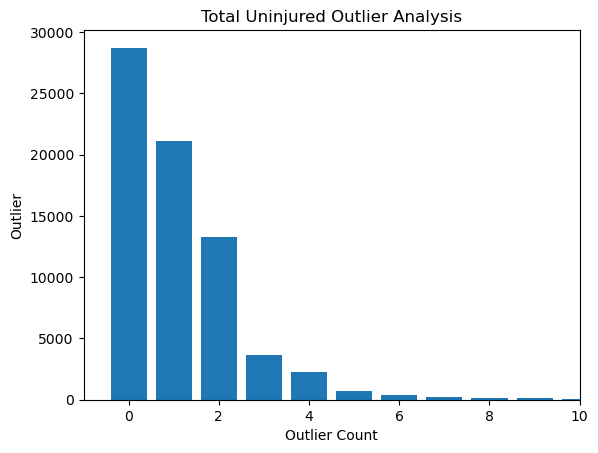

In [39]:
# Identify all outliers of Total.Uninjured
mask = ad_6['Total.Uninjured'].value_counts()

# Assign x, y
x = mask.index
y = mask.values

fig, ax = plt.subplots()

ax.bar(x,y)
plt.xlim(xmin=-1, xmax=10)
ax.set_title('Total Uninjured Outlier Analysis')
ax.set_xlabel('Outlier Count')
ax.set_ylabel('Outlier');

Looks like it makes sense to get rid of outliers with values >7 in `Total.Uninjured`.

In [40]:
# Eliminate outliers (>7) in Total.Uninjured

ad_7 = ad_6.copy()

mask_outliers = ad_6['Total.Uninjured'] < 8
ad_7 = ad_7[mask_outliers]

# New describe check
ad_7.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year,Total.Injuries
count,70374.000000,70374.000000,70374.000000,70374.000000,70374.000000,70374.000000,70374.000000
mean,1.108819,0.521315,0.227556,0.260323,1.071177,1998.055731,1.009194
std,0.382141,4.257762,1.176820,0.769859,1.232972,12.653554,4.615069
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1987.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1995.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2011.000000,1.000000
max,8.000000,295.000000,161.000000,62.000000,7.000000,2022.000000,295.000000


#### Get Top 25 Used `Make`

To be able to analyze which `Make` makes sense to start with, we want to find the top 25 being used.

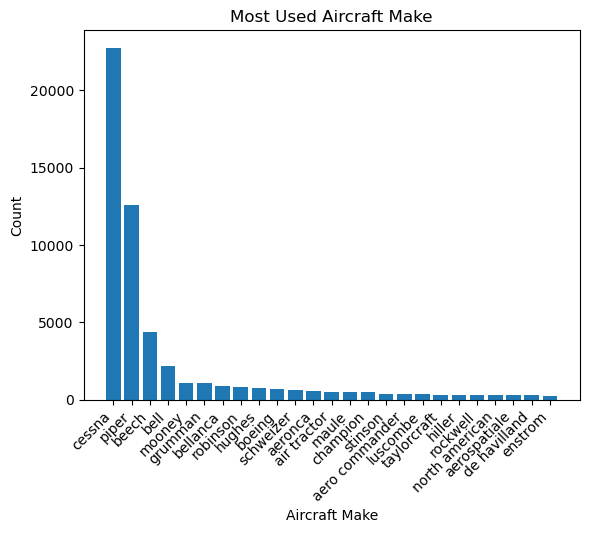

In [41]:
# Get the top 25 'Make' and see which aircrafts are most popular
top25_make_names = ad_7['Make'].value_counts().nlargest(25).index

# Filter the DataFrame to include only the top 25 'Make' values
top25_make_data = ad_7[ad_7['Make'].isin(top25_make_names)]

# Count occurrences of each 'Make'
make_counts = top25_make_data['Make'].value_counts()

#Plot
fig, ax = plt.subplots()

plt.bar(make_counts.index, make_counts.values)

plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.title('Most Used Aircraft Make')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

<br> If we view this data numerically, we can see that ~43% of aircrafts being used are of Cessna make. This aligns with the information provided by CNN about best selling airplanes.

**Source:** <a href = "https://www.cnn.com/travel/article/world-best-selling-airplanes/index.html">Best Selling Airplain</a>

In [42]:
top25_make_data['Make'].value_counts(normalize=True)*100

cessna            42.970417
piper             23.778059
beech              8.233117
bell               4.053314
mooney             2.069135
grumman            1.976628
bellanca           1.699107
robinson           1.587721
hughes             1.434801
boeing             1.264891
schweizer          1.193151
aeronca            1.040231
air tractor        0.977930
maule              0.900527
champion           0.866545
stinson            0.711737
aero commander     0.672091
luscombe           0.653212
taylorcraft        0.613566
hiller             0.611679
rockwell           0.598463
north american     0.589024
aerospatiale       0.530499
de havilland       0.500293
enstrom            0.473862
Name: Make, dtype: float64

#### Top `Make` Compared with `Total.Uninjured` and `Aircraft.damage`

We can tell that Cessna is the most widely used make by far. We would also want to know if it causes the least injuries and aircraft damage. 

In addition, we can see that our decision regarding make comes down to the top 4 since beyond that, the count is pretty evenly disperced among the rest of the make types.


For `Total.Uninjured` vs `Make` analysis, it's hard to get any truly significant results since there are only max 7 uninjured passengers after removing outliers. Though, we can tell that Cessna has a leg up on the other top 4 makes. Regardless, we would want more data to confirm that make has the least risk associated with it.

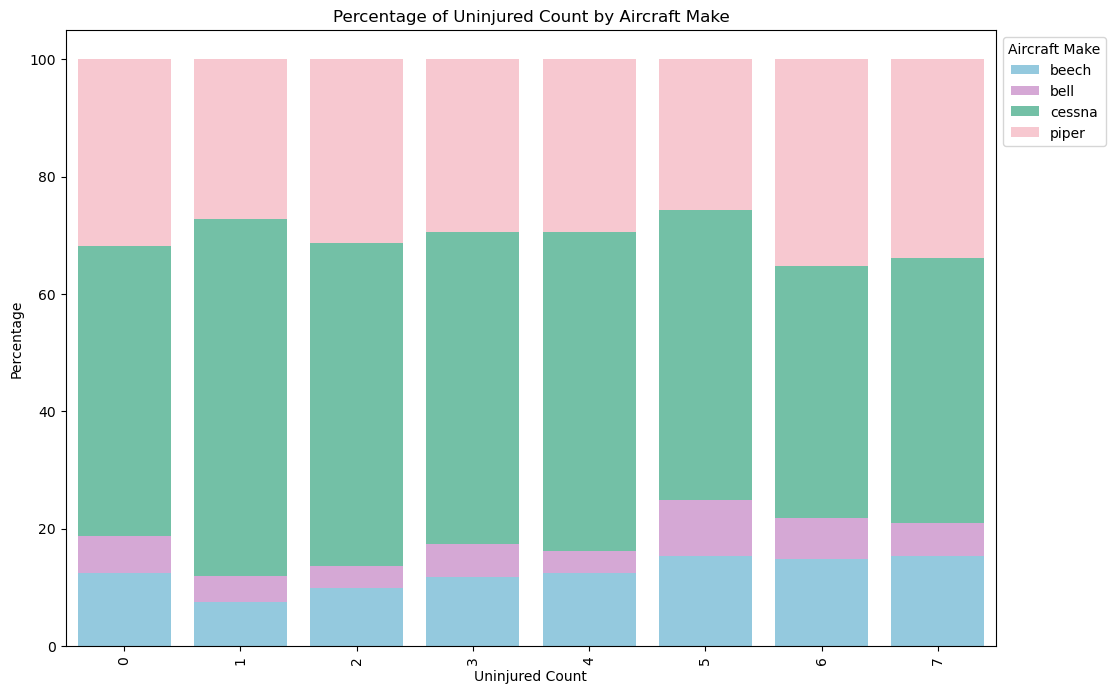

In [78]:
# Filter further to Top 4 Make - starting with established DataBase
top25_make_data

# Use previous top25_make_data created
top4_make_names = top25_make_data['Make'].value_counts().nlargest(4).index

# Filter the DataFrame to include only the top 10 'Make' values
top4_make_data = top25_make_data[top25_make_data['Make'].isin(top4_make_names)]

# Calculate percentage values for each category per 'Make'
percentage_uninjured = top4_make_data.groupby(['Total.Uninjured', 'Make']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create a bar plot with percentage values
plt.figure(figsize=(12, 8))

# Use hue parameter to stack 'destroyed', 'substantial', 'minor' categories
sns.barplot(x='Total.Uninjured', y='beech', data=percentage_uninjured.reset_index(), color='skyblue', label='beech')
sns.barplot(x='Total.Uninjured', y='bell', data=percentage_uninjured.reset_index(), color='plum', label='bell', 
            bottom=percentage_uninjured['beech'])
sns.barplot(x='Total.Uninjured', y='cessna', data=percentage_uninjured.reset_index(), color='mediumaquamarine', label='cessna', 
            bottom=percentage_uninjured['beech'] + percentage_uninjured['bell'])
sns.barplot(x='Total.Uninjured', y='piper', data=percentage_uninjured.reset_index(), color='pink', label='piper', 
            bottom=percentage_uninjured['beech'] + percentage_uninjured['bell'] + percentage_uninjured['cessna'])

# Add labels and title
plt.xlabel('Uninjured Count')
plt.ylabel('Percentage')
plt.title('Percentage of Uninjured Count by Aircraft Make')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Make',bbox_to_anchor=(1, 1))

# Show the plot
plt.show();

<br> When comparing `Make` with `Aircraft.damage` we can see that because Cessna is still by far the most popular, it also records the most substantial damage to the air craft. However, at this point, it does not *seem* have significanly more cases of destroyed aircrafts than lesser used makes.

Again, we see that beyond the top 4 makes, the analysis becomes insignificant.

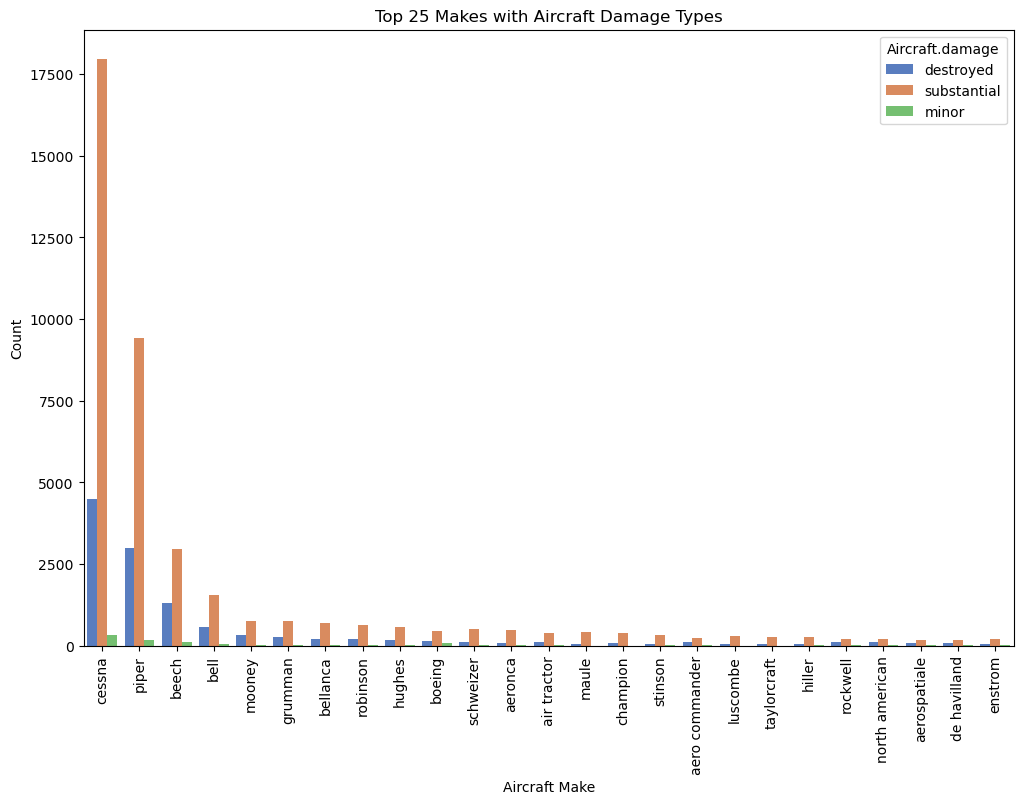

In [44]:
# Visualize top 25 'Make' with 'Aircraft.damage'

# Use previously established DataFrame
top25_make_data

# Get the order of 'Make' based on count in descending order
make_order = top25_make_data['Make'].value_counts().index

# Create a grouped bar chart comparing 'Make' and 'Aircraft.damage'
plt.figure(figsize=(12, 8))
sns.countplot(x='Make', hue='Aircraft.damage', data=top25_make_data, palette='muted', order=make_order)

# Add labels and title
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.title('Top 25 Makes with Aircraft Damage Types')
plt.xticks(rotation=90)

# Show the plot
plt.show()

<br> Finally we want to compare `Make` and `Aircraft.damage` on a percentage scale to be certain which make poses least risk to the aircraft during an accident.

We can see that though it looked like Piper might have a lesser percentage of destroyed aircrafts, in fact, it is Cessna that poses least risk.

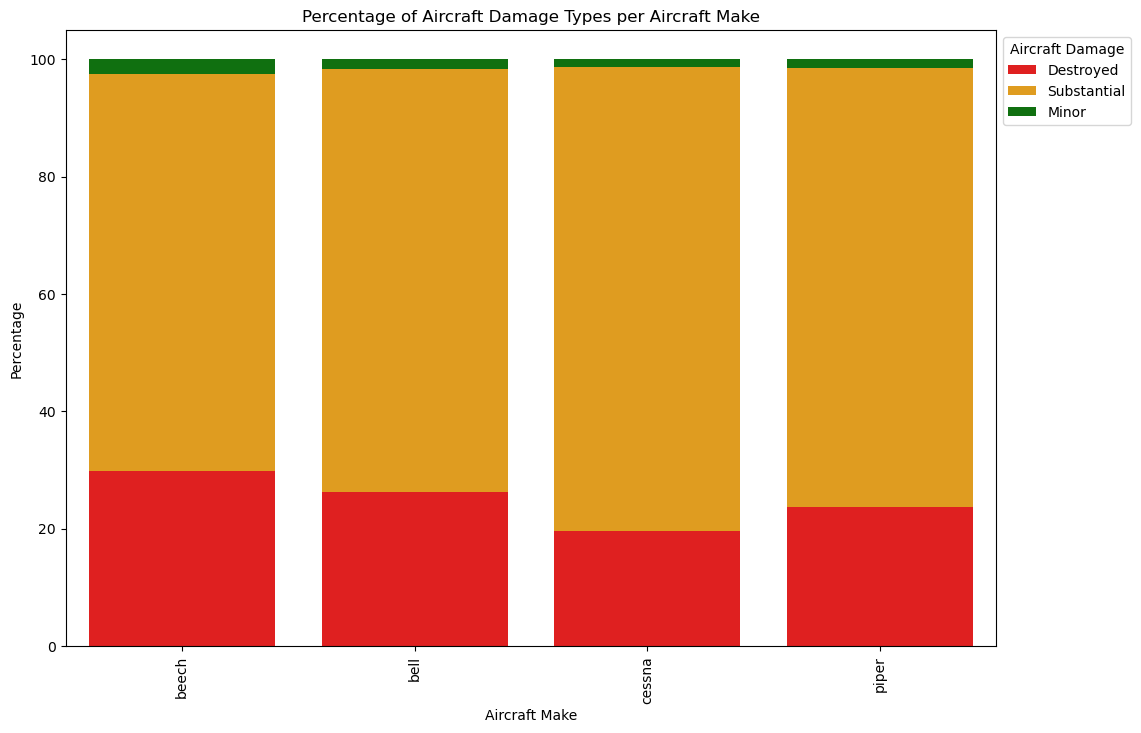

In [80]:
# We can use previously established DataFrame
top4_make_data

# Calculate percentage values for each category per 'Make'
percentage_damage = top4_make_data.groupby(['Make', 'Aircraft.damage']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create a bar plot with percentage values
plt.figure(figsize=(12, 8))

# Use hue parameter to stack 'destroyed', 'substantial', 'minor' categories
sns.barplot(x='Make', y='destroyed', data=percentage_damage.reset_index(), color='red', label='Destroyed')
sns.barplot(x='Make', y='substantial', data=percentage_damage.reset_index(), color='orange', label='Substantial', 
            bottom=percentage_damage['destroyed'])
sns.barplot(x='Make', y='minor', data=percentage_damage.reset_index(), color='green', label='Minor', 
            bottom=percentage_damage['destroyed'] + percentage_damage['substantial'])

# Add labels and title
plt.xlabel('Aircraft Make')
plt.ylabel('Percentage')
plt.title('Percentage of Aircraft Damage Types per Aircraft Make')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1, 1))

# Show the plot
plt.show();

<br> If we look at the data numerically below, we can see that ~20% of Cessna accidents destroy the aircraft while Piper, the second most used make, has ~24% of accidents resulting in a destroyed aircraft.

In [46]:
# Table of percentages
top4_make_data.groupby(['Make', 'Aircraft.damage']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

Aircraft.damage,destroyed,minor,substantial
Make,,,
beech,29.786746,2.545288,67.667966
bell,26.222636,1.583605,72.193759
cessna,19.669610,1.392733,78.937657
piper,23.731640,1.421199,74.847162


#### `Model` vs `Aircraft.damage`

We can see that within the Cessna make, the 152 model used most often and that the difference between these models decreases after the top 4.

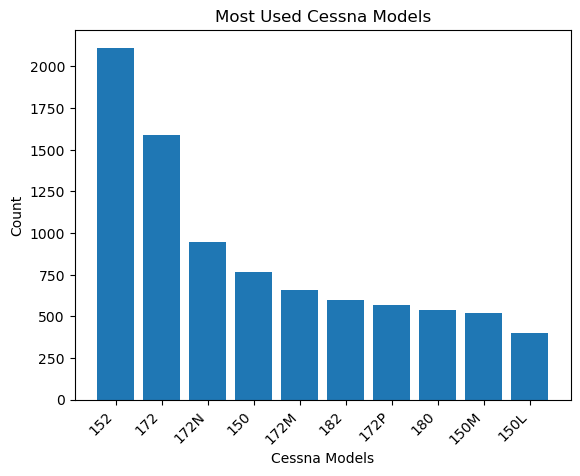

In [47]:
# Isolate data with Cessna as the make
cessna_mask = ad_7['Make'] == 'cessna'
cessna_make_data = ad_7[cessna_mask]

# Get the top 10 'Model' and see which Cessna models are most used
top10_models = cessna_make_data['Model'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 models
top10_model_data = cessna_make_data[cessna_make_data['Model'].isin(top10_models)]

# Count occurrences of each 'Model'
model_counts = top10_model_data['Model'].value_counts()

#Plot
fig, ax = plt.subplots()

plt.bar(model_counts.index, model_counts)

plt.xlabel('Cessna Models')
plt.ylabel('Count')
plt.title('Most Used Cessna Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show();

<br> Now we can compare the top 4 `Model` types with `Aircraft.damage`. Though slight, we can clearly see the Cessna 172 model recorded the least number of damaged airplanes.

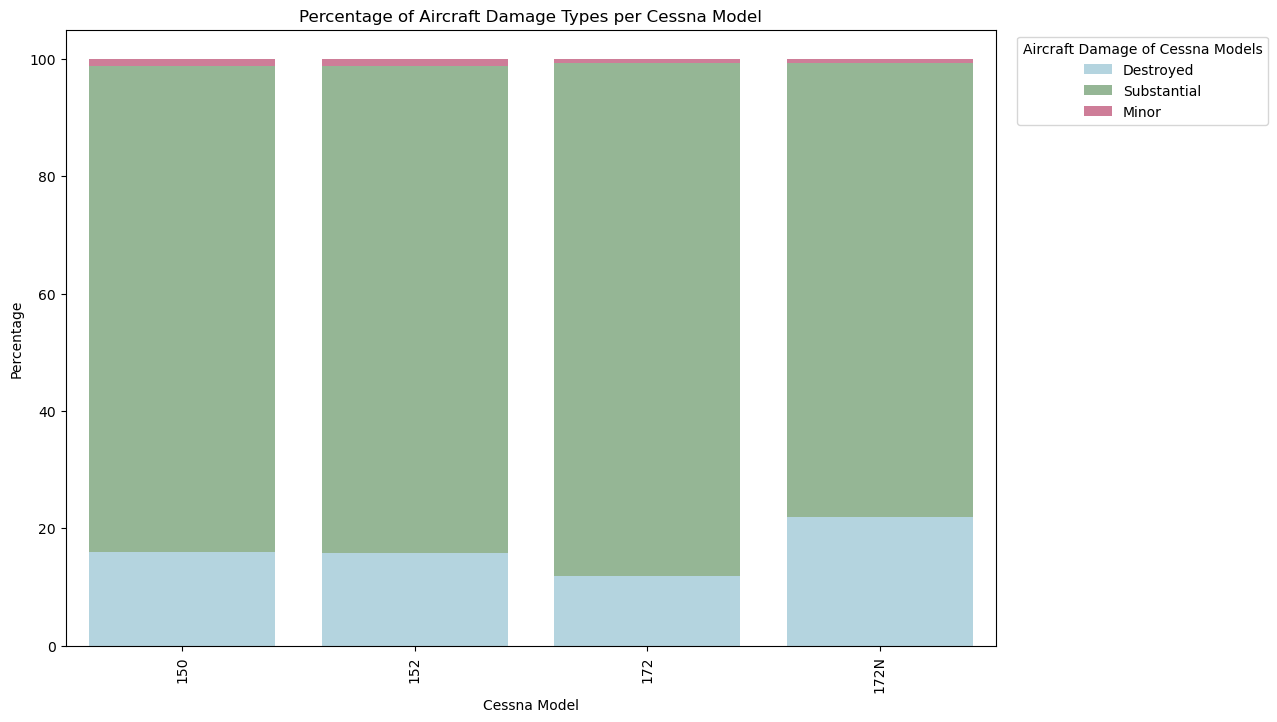

In [48]:
# Use established DataBase
cessna_make_data

# Get the top 4 'Make' and see which aircrafts are most popular
top4_models = cessna_make_data['Model'].value_counts().nlargest(4).index

# Filter the DataFrame to include only the top 25 'Make' values
top4_model_data = cessna_make_data[cessna_make_data['Model'].isin(top4_models)]

# Calculate percentage values for each category per 'Make'
perc_model_damage = top4_model_data.groupby(['Model', 'Aircraft.damage']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create a bar plot with percentage values
plt.figure(figsize=(12, 8))

# Use hue parameter to stack 'destroyed', 'substantial', 'minor' categories
sns.barplot(x='Model', y='destroyed', data=perc_model_damage.reset_index(), color='lightblue', label='Destroyed')
sns.barplot(x='Model', y='substantial', data=perc_model_damage.reset_index(), color='darkseagreen', label='Substantial', 
            bottom=perc_model_damage['destroyed'])
sns.barplot(x='Model', y='minor', data=perc_model_damage.reset_index(), color='palevioletred', label='Minor', 
            bottom=perc_model_damage['destroyed'] + perc_model_damage['substantial'])

# Add labels and title
plt.xlabel('Cessna Model')
plt.ylabel('Percentage')
plt.title('Percentage of Aircraft Damage Types per Cessna Model')
plt.xticks(rotation=90)
plt.legend(title='Aircraft Damage of Cessna Models', loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show();

<br> If we look at the data numerically below, we can see that ~12% of the Cessna 172 model destroyed the aircraft, which is less than any of the top 4 Cessna models used.

In [82]:
top4_model_data.groupby(['Model', 'Aircraft.damage']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

Aircraft.damage,destroyed,minor,substantial
Model,,,
150,15.947712,1.176471,82.875817
152,15.846736,1.229896,82.923368
172,11.831340,0.629327,87.539333
172N,21.858501,0.633580,77.507920


#### `Engine.Type` to `Total.Injuries` for Cessna `Make`

As we can see, the Reciprocating engine yields the least injuries for Cessna planes.

In [86]:
cessna_make_data['Total.Injuries'].sort_values(ascending=False)

46646    16.0
44555    15.0
65235    14.0
74372    14.0
87471    14.0
         ... 
13783     0.0
37106     0.0
37107     0.0
13782     0.0
32112     0.0
Name: Total.Injuries, Length: 22761, dtype: float64

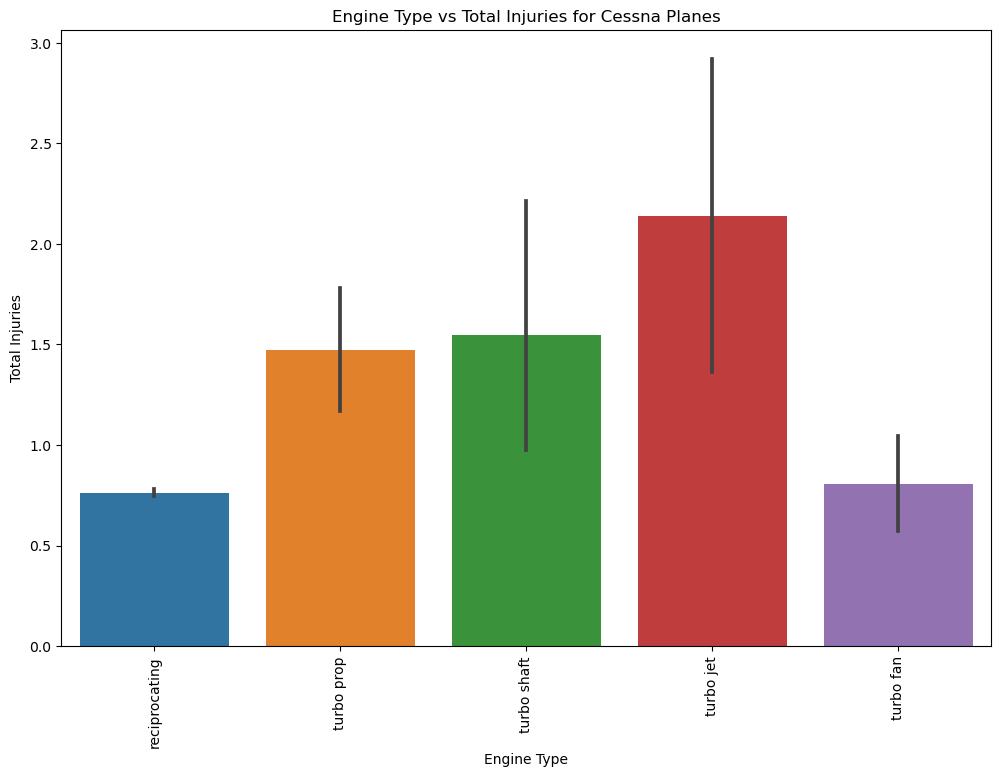

In [87]:
# Use previously established DataFrame
cessna_make_data

# Define total injury values and index
injuries_values = cessna_make_data['Total.Injuries'].sort_values(ascending=False).values
injuries_index = cessna_make_data['Total.Injuries'].sort_values(ascending=False).index

# Filter for engine type
engine_values = cessna_make_data.loc[injuries_index, 'Engine.Type'].values

# Plot bar graph
fig, ax = plt.subplots(figsize = (12,8))

sns.barplot(x=engine_values, y=injuries_values, data = cessna_make_data)
ax.set_xlabel("Engine Type")
ax.set_ylabel("Total Injuries")
ax.set_title("Engine Type vs Total Injuries for Cessna Planes")
plt.xticks(rotation=90)
plt.show();

<br> We can see that numerically, the Reciprocating engine yields percentages in the 90's for lower total injury counts (0-6).

In [89]:
# Engine type distribution within total injuries 
cessna_grouped = cessna_make_data.groupby(by=['Total.Injuries','Engine.Type']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Drop NaN for cleaner look
cessna_grouped.dropna(inplace=True,axis=0)

cessna_grouped

Engine.Type,reciprocating,turbo fan,turbo jet,turbo prop,turbo shaft
Total.Injuries,,,,,
0.0,98.215331,0.775307,0.102399,0.775307,0.131656
1.0,97.536265,0.460511,0.092102,1.634815,0.276307
2.0,98.265695,0.520291,0.242803,0.867152,0.104058
3.0,97.705314,0.724638,0.241546,0.966184,0.362319
4.0,98.145286,0.927357,0.154560,0.463679,0.309119
6.0,91.000000,1.000000,1.000000,6.000000,1.000000
7.0,84.444444,2.222222,4.444444,6.666667,2.222222


### `Weather.Condition` vs `Injury Severity`

When we observe `Injury.Severity` by `Weather.Condition` we can see that most fatal injuries occur during IMC at ~60% of accident instances being fatal vs ~14% in VMC.

**Definition:** Visual meteorological conditions (VMC) is an aviation flight category 
in which visual flight rules (VFR) flight is permitted—that is, conditions in which 
pilots have sufficient visibility to fly the aircraft maintaining visual separation 
from terrain and other aircraft. 

In aviation, instrument meteorological conditions (IMC) are weather conditions that 
require pilots to fly primarily by reference to flight instruments. Typically, this 
means flying in cloud or poor weather, where little or nothing can be seen or recognised 
when looking out of the window. 

**Source:** <a href = https://en.wikipedia.org/wiki/Visual_meteorological_conditions>Wikipedia</a>

In [52]:
# Use previously established Dataframe
cessna_make_data

# Group by Weather Condition & Injury Severity
cessna_make_data.groupby(by=['Weather.Condition','Injury.Severity']).size().unstack().apply(lambda x: x/x.sum(),axis=1)*100

Injury.Severity,fatal,incident,minor,non-fatal,serious
Weather.Condition,,,,,
IMC,59.709619,0.604961,0.060496,39.564428,0.060496
VMC,13.454614,0.753269,0.279515,85.394163,0.118439


## 4. Conclusion & Recommendations

**Data Limitation**

There was some missingness which could not be accounted for and therefore, columns had to be dropped. There are also potential duplicates as `Event.Id` and `Accident.Number` have duplicate values but display slighly different records with some shared information. There is a lack of understanding whether these are supposed to be unique identifiers and it is recommended to obtain additional data for any additional phases of department expansion. There were also columns such as `Aircraft.carrier` that may be useful to analyse but had too much mixed data to be able to adequately organize. 


**Recommendations**

*`Make`:* Cessna <br>
As Cessna airplanes are most widely used and have destroyed the least percentage of airplanes within the accident report.

*`Model`:* Cessna 172 <br>
Cessna 172 airplane has shown that only 12% of accidents result in a destroyed airplane, this is less `Aircraft.damage` than caused by any of the other top 4 Cessna models.

*`Engine.Type`:* Reciprocating <br>
Reciprocating engine yields percentages in the 90's for lower `Total.Injuries` counts (0-6), making it the safest engine a Cessna airplane can have.

*Safety Training:* Thorough safety training <br>
Extra attention to training in IMC during which, pilots are primariy flying by reference to flight instruments. The percent of fatal `Injury.Severity` is highest at ~60% vs ~14% in VMC.

**Conclusion** <br>

For Phase 1 of Aviation Department exansion we suggest starting small with Cessna 172 as it poses least risk overall to passengers and business development. For next steps we suggest addressing the *data limitations* to perform a more robust analysis regarding additional Aircrafts we want to invest in for Phase 2.
